In [1]:
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.operators.sampling.lhs import LatinHypercubeSampling
from pymoo.optimize import minimize as moo_minimize
from pymoo.algorithms.moo.nsga3 import ReferenceDirectionSurvival
from pymoode.nsder import NSDER
from pymoode.gde3 import GDE3
from pymoode.survivors import RankSurvival
from pymoo.factory import get_reference_directions

In [2]:
from pymoo.factory import get_problem
from pymoo.util.plotting import plot

problem = get_problem("dtlz2")

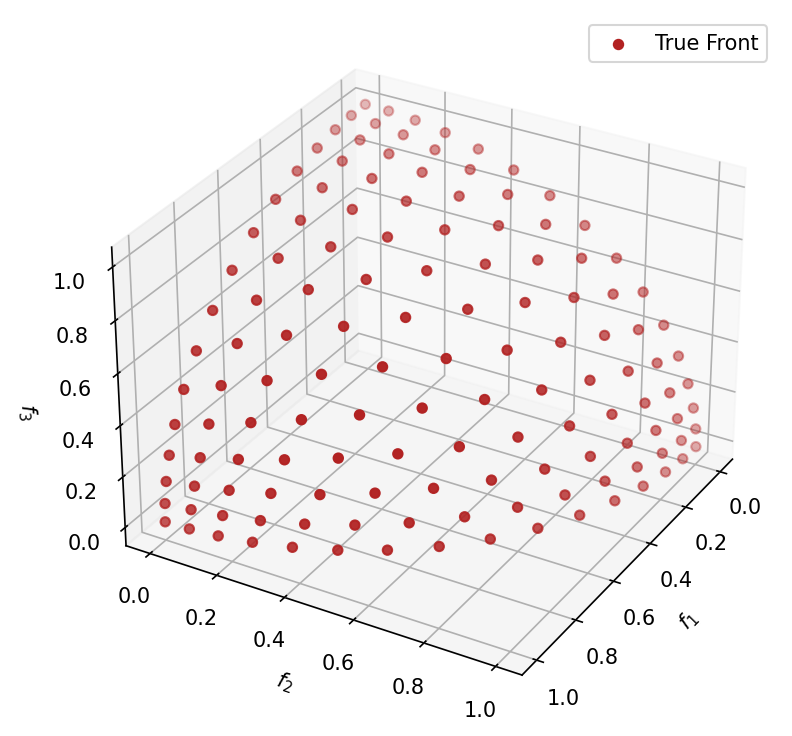

In [3]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})
ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [4]:
lhs = LatinHypercubeSampling()

In [5]:
NGEN = 250
POPSIZE = 136
SEED = 3

In [6]:
problem.__dict__

{'k': 8,
 'n_var': 10,
 'n_obj': 3,
 'n_constr': 0,
 'data': {'type_var': numpy.float64},
 'xl': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'xu': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'callback': None,
 'check_inconsistencies': True,
 'replace_nan_values_by': inf,
 'exclude_from_serialization': [],
 '_pareto_set': <pymoo.util.cache.Cache at 0x22b8ac1a760>,
 '_pareto_front': <pymoo.util.cache.Cache at 0x22b8ac1ac70>,
 '_ideal_point': None,
 '_nadir_point': None}

In [7]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=15)

In [8]:
ref_dirs.shape

(136, 3)

In [9]:
gde3 = GDE3(pop_size=POPSIZE, CR=0.2, F=(0.0, 1.0), sampling=lhs, gamma=1e-4, refpoint=1,
            variant="DE/rand/1/bin", SA=0.5,
            survival=RankSurvival(rule="full", crowding_func="mnn")
            )

res_gde3 = moo_minimize(problem,
                        gde3,
                        ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     136 |  0.409543711 |  0.501275985
    2 |     272 |  0.373092920 |  0.460600017
    3 |     408 |  0.336209213 |  0.431189355
    4 |     544 |  0.318798130 |  0.409877187
    5 |     680 |  0.292805821 |  0.383625016
    6 |     816 |  0.256416666 |  0.352601211
    7 |     952 |  0.233049510 |  0.332726062
    8 |    1088 |  0.203452357 |  0.308708200
    9 |    1224 |  0.191711241 |  0.273361374
   10 |    1360 |  0.179272315 |  0.241324514
   11 |    1496 |  0.162977830 |  0.207589781
   12 |    1632 |  0.151896923 |  0.190223908
   13 |    1768 |  0.139012032 |  0.174191858
   14 |    1904 |  0.128405707 |  0.161870995
   15 |    2040 |  0.118110765 |  0.147510685
   16 |    2176 |  0.109853399 |  0.133569221
   17 |    2312 |  0.101442014 |  0.117330105
   18 |    2448 |  0.092199877 |  0.112359249
   19 |    2584 |  0.085994381 |  0.098432186
   20 |    2720 |  0.084148881 |  0.093201117
   21 |    2856 |  0.077553917 |  

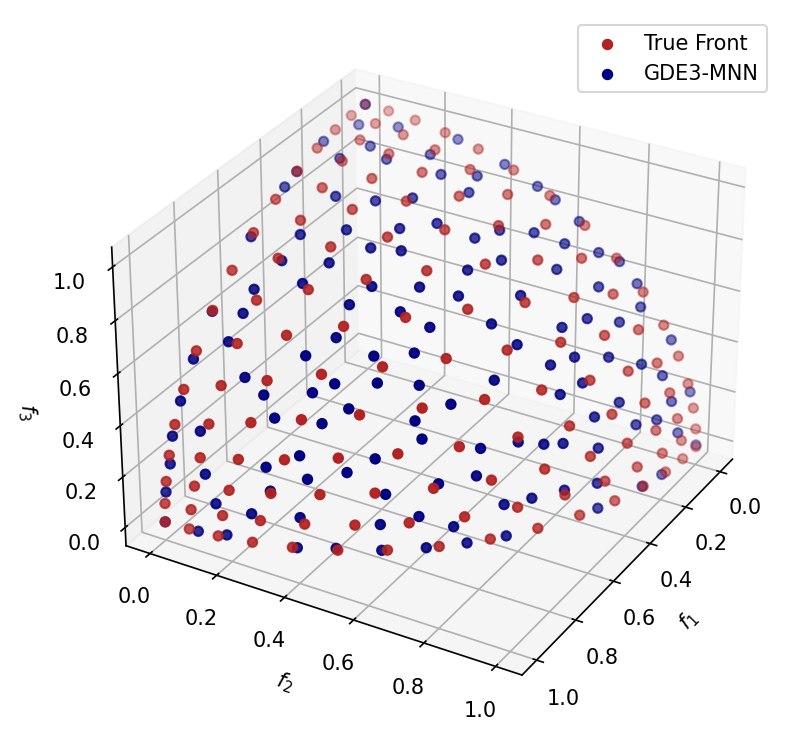

In [10]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], res_gde3.F[:, 2],
        color="navy", label="GDE3-MNN", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [11]:
nsga3 = NSGA3(pop_size=POPSIZE, sampling=lhs,
              ref_dirs=ref_dirs)

res_nsga3 = moo_minimize(problem,
                         nsga3,
                         ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     136 |  0.409543711 |  0.488790248
    2 |     272 |  0.379635563 |  0.471769797
    3 |     408 |  0.344446344 |  0.462725109
    4 |     544 |  0.311356774 |  0.379455101
    5 |     680 |  0.276861595 |  0.341810021
    6 |     816 |  0.242685082 |  0.288821435
    7 |     952 |  0.206166293 |  0.253956090
    8 |    1088 |  0.171647235 |  0.190395125
    9 |    1224 |  0.163088720 |  0.176998052
   10 |    1360 |  0.140361247 |  0.142812235
   11 |    1496 |  0.123655499 |  0.125153020
   12 |    1632 |  0.116637818 |  0.115771849
   13 |    1768 |  0.102922260 |  0.099178463
   14 |    1904 |  0.095706817 |  0.085479036
   15 |    2040 |  0.089658263 |  0.079800626
   16 |    2176 |  0.085228229 |  0.074333031
   17 |    2312 |  0.077633353 |  0.066933718
   18 |    2448 |  0.075609942 |  0.061667907
   19 |    2584 |  0.072389779 |  0.058579648
   20 |    2720 |  0.070784669 |  0.059067275
   21 |    2856 |  0.066376079 |  

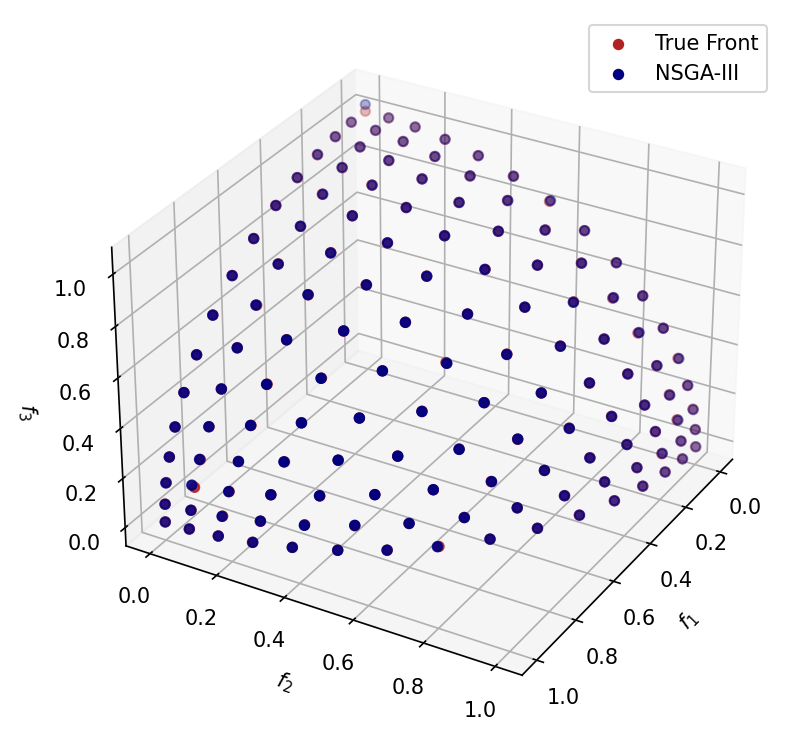

In [12]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_nsga3.F[:, 0], res_nsga3.F[:, 1], res_nsga3.F[:, 2],
        color="navy", label="NSGA-III", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [13]:
nsder = NSDER(ref_dirs=ref_dirs, pop_size=POPSIZE, CR=0.2, F=(0.0, 1.0), sampling=lhs, gamma=1e-4, refpoint=1.0,
             variant="DE/rand/1/bin", SA=0.5)
    
res_nsder = moo_minimize(problem,
                         nsder,
                         ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     136 |  0.409543711 |  0.488790248
    2 |     272 |  0.378779837 |  0.467935902
    3 |     408 |  0.353316102 |  0.419118969
    4 |     544 |  0.325895401 |  0.394393696
    5 |     680 |  0.300118552 |  0.380007408
    6 |     816 |  0.268490686 |  0.315913905
    7 |     952 |  0.227032701 |  0.266769329
    8 |    1088 |  0.208844772 |  0.239396032
    9 |    1224 |  0.183800236 |  0.196222430
   10 |    1360 |  0.171624674 |  0.192821203
   11 |    1496 |  0.154689180 |  0.172397048
   12 |    1632 |  0.156492245 |  0.160450827
   13 |    1768 |  0.147947645 |  0.133404806
   14 |    1904 |  0.126022173 |  0.118615896
   15 |    2040 |  0.114987063 |  0.112948515
   16 |    2176 |  0.102443197 |  0.090790311
   17 |    2312 |  0.087517255 |  0.082245929
   18 |    2448 |  0.085308476 |  0.068936171
   19 |    2584 |  0.083333862 |  0.065425162
   20 |    2720 |  0.077247912 |  0.062026488
   21 |    2856 |  0.071188233 |  

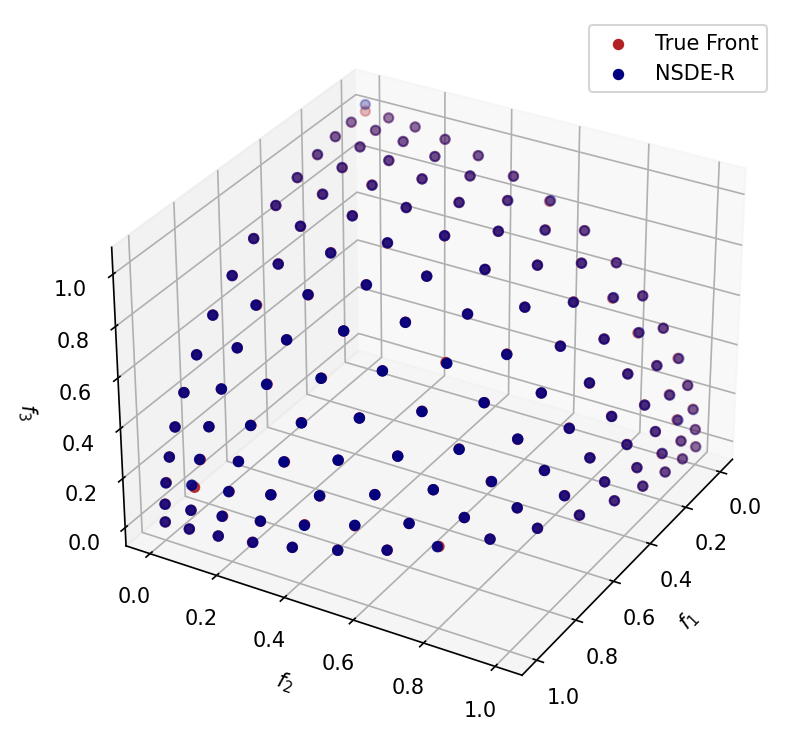

In [14]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_nsga3.F[:, 0], res_nsga3.F[:, 1], res_nsga3.F[:, 2],
        color="navy", label="NSDE-R", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()